Model Accuracy: 0.91
Confusion Matrix:
[[ 62  14]
 [  5 119]]
Conversion rate for Image 0: 36.33%
Conversion rate for Image 1: 92.55%


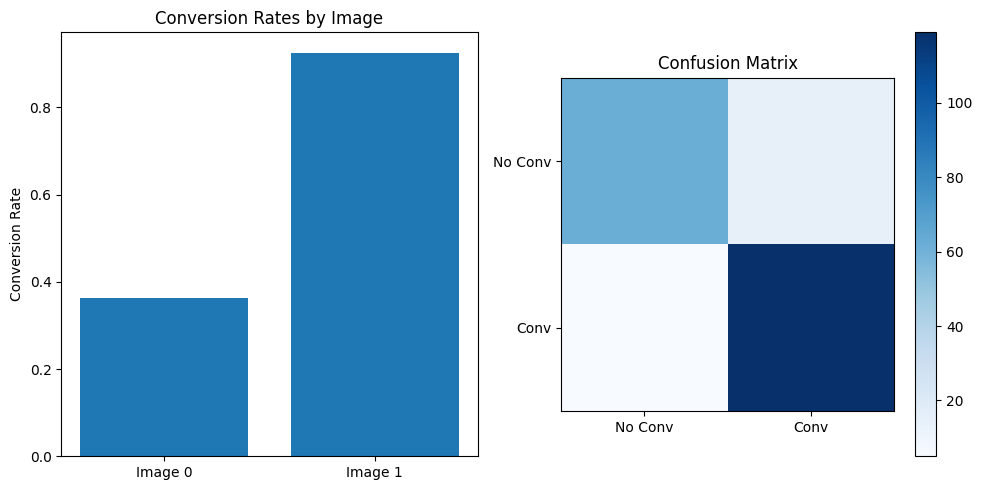

Probability of conversion for a new customer: 79.37%


In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
n_samples = 1000

# Features: image_id (0 or 1), customer_age, customer_gender (0 or 1)
X = np.column_stack((
    np.random.randint(0, 2, n_samples),  # image_id
    np.random.normal(35, 10, n_samples),  # customer_age
    np.random.randint(0, 2, n_samples)  # customer_gender
))

# Target: conversion (0 or 1)
y = (0.3 * X[:, 0] + 0.01 * X[:, 1] + 0.2 * X[:, 2] + np.random.normal(0, 0.1, n_samples) > 0.5).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Analyze the impact of different images
image_0_conv_rate = y[X[:, 0] == 0].mean()
image_1_conv_rate = y[X[:, 0] == 1].mean()

print(f"Conversion rate for Image 0: {image_0_conv_rate:.2%}")
print(f"Conversion rate for Image 1: {image_1_conv_rate:.2%}")

# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Image 0', 'Image 1'], [image_0_conv_rate, image_1_conv_rate])
plt.title('Conversion Rates by Image')
plt.ylabel('Conversion Rate')

plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Conv', 'Conv'])
plt.yticks(tick_marks, ['No Conv', 'Conv'])

plt.tight_layout()
plt.show()

# Function to predict conversion probability for a new customer
def predict_conversion(image_id, customer_age, customer_gender):
    features = np.array([[image_id, customer_age, customer_gender]])
    prob = model.predict_proba(features)[0, 1]
    return prob

# Example usage
new_customer_prob = predict_conversion(1, 30, 0)
print(f"Probability of conversion for a new customer: {new_customer_prob:.2%}")

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont

# Function to create a simulated sales personnel image
def create_sales_image(image_id, size=(100, 100)):
    image = Image.new('RGB', size, color='white')
    draw = ImageDraw.Draw(image)

    if image_id == 0:
        # Simple stick figure
        draw.line((40, 30, 40, 70), fill='black', width=2)
        draw.line((20, 50, 60, 50), fill='black', width=2)
        draw.line((40, 70, 20, 90), fill='black', width=2)
        draw.line((40, 70, 60, 90), fill='black', width=2)
        draw.ellipse((30, 10, 50, 30), outline='black', width=2)
    else:
        # Smiling face
        draw.ellipse((20, 20, 80, 80), outline='black', width=2)
        draw.arc((30, 30, 70, 70), 0, 180, fill='black', width=2)
        draw.ellipse((35, 35, 45, 45), fill='black')
        draw.ellipse((55, 35, 65, 45), fill='black')

    return image

# Simulate more complex data
np.random.seed(42)
n_samples = 5000

# Features: image_id, customer_age, customer_gender, time_spent_on_page, previous_purchases
X = np.column_stack((
    np.random.randint(0, 2, n_samples),  # image_id
    np.random.normal(35, 10, n_samples),  # customer_age
    np.random.randint(0, 2, n_samples),  # customer_gender
    np.random.exponential(2, n_samples),  # time_spent_on_page
    np.random.poisson(2, n_samples)  # previous_purchases
))

# Target: conversion (0 or 1)
y = (0.3 * X[:, 0] + 0.01 * X[:, 1] + 0.2 * X[:, 2] + 0.1 * X[:, 3] + 0.05 * X[:, 4] +
     np.random.normal(0, 0.1, n_samples) > 0.5).astype(int)

# Create a DataFrame
columns = ['image_id', 'customer_age', 'customer_gender', 'time_spent_on_page', 'previous_purchases']
df = pd.DataFrame(X, columns=columns)
df['conversion'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.96

Confusion Matrix:
[[ 57  20]
 [ 20 903]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        77
           1       0.98      0.98      0.98       923

    accuracy                           0.96      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.96      0.96      0.96      1000




Conversion rate for Image 0: 83.71%
Conversion rate for Image 1: 99.44%


Text(767.7810457516341, 0.5, 'Actual')

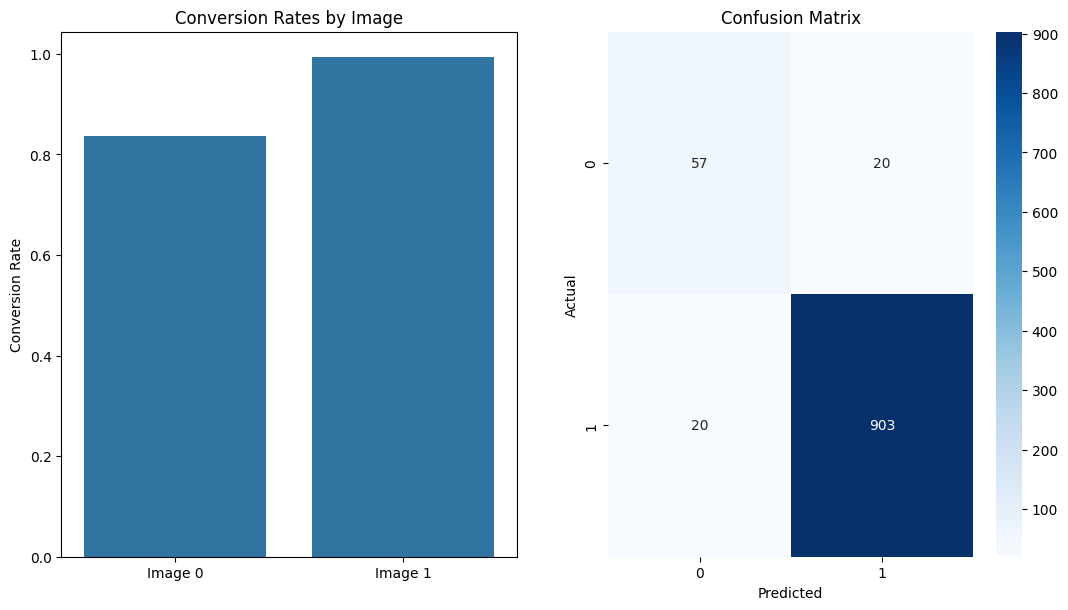

In [24]:
# Analyze the impact of different images
image_0_conv_rate = df[df['image_id'] == 0]['conversion'].mean()
image_1_conv_rate = df[df['image_id'] == 1]['conversion'].mean()

print(f"\nConversion rate for Image 0: {image_0_conv_rate:.2%}")
print(f"Conversion rate for Image 1: {image_1_conv_rate:.2%}")

# Visualizations
plt.figure(figsize=(20, 15))

# 1. Conversion Rates by Image
plt.subplot(2, 3, 1)
sns.barplot(x=['Image 0', 'Image 1'], y=[image_0_conv_rate, image_1_conv_rate])
plt.title('Conversion Rates by Image')
plt.ylabel('Conversion Rate')

# 2. Confusion Matrix
plt.subplot(2, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
